## Import dataset

In [22]:
import pandas as pd
from copy import deepcopy
from sklearn.datasets import load_iris
d=load_iris()
df=pd.DataFrame(d['data'], columns=d['feature_names'])
df_x=deepcopy(df)
df_x.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Normalize the data

In [23]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler() 

# fitting 
scalar.fit(df_x) 
scaled_data = scalar.transform(df_x)

# np.array to dataframe
df_x=pd.DataFrame(scaled_data, columns=df_x.columns)

## Run KMeans algo for various number of centroids

In [24]:
from sklearn.cluster import KMeans

models=list()

# dummy model with 0 no. of clusters for simplification in computation
modeli=KMeans().fit(df_x)
models.append(modeli)

# clustering algorithm for range 1:10 no of clusters
for i in range(1,11):
    models.append(KMeans(n_clusters=i, init='random',
n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
).fit(df_x))

## Elbow Method analysis to select the best no. of centroids

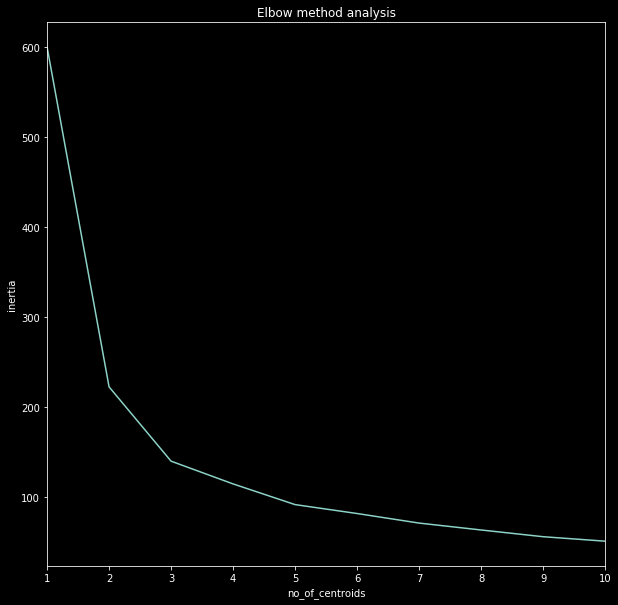

In [25]:
import matplotlib.pyplot as plt

plt.title("Elbow method analysis")
plt.style.use('dark_background')
plt.plot([model.inertia_ for model in models])
plt.xlabel('no_of_centroids')
plt.xlim(1, 10)
plt.ylabel('inertia')
plt.show()

## Model selection from elbow method

In [26]:
# Best model selection based on sharp turn in the graph
df['Cluster_index']=models[3].predict(df_x)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster_index
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Visualization

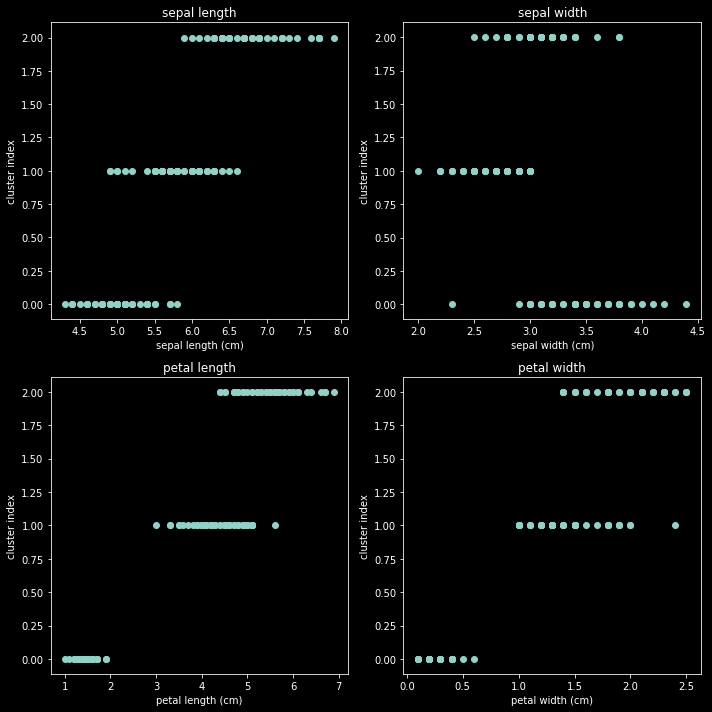

In [27]:
import matplotlib
plt.rcParams['figure.figsize'] = [10, 10]
plt.style.use('dark_background')
matplotlib.rcParams.update({'font.size': 10})

plt.subplot(2,2,1)
plt.title('sepal length')
plt.scatter(df['sepal length (cm)'], df['Cluster_index'])
plt.xlabel('sepal length (cm)')
plt.ylabel('cluster index')
plt.tight_layout()

plt.subplot(2,2,2)
plt.title('sepal width')
plt.scatter(df['sepal width (cm)'], df['Cluster_index'])
plt.xlabel('sepal width (cm)')
plt.ylabel('cluster index')
plt.tight_layout()

plt.subplot(2,2,3)
plt.title('petal length')
plt.scatter(df['petal length (cm)'], df['Cluster_index'])
plt.xlabel('petal length (cm)')
plt.ylabel('cluster index')
plt.tight_layout()

plt.subplot(2,2,4)
plt.title('petal width')
plt.scatter(df['petal width (cm)'], df['Cluster_index'])
plt.xlabel('petal width (cm)')
plt.ylabel('cluster index')
plt.tight_layout()